In [1]:
import pandas as pd
import json


In [6]:
# # === Step 1: Load predictions ===
# svm_df = pd.read_excel(r"C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\Dataset3_no_context\collection_svm\SVM_test_predictions.xlsx")
# lr_df = pd.read_excel(r"C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\Dataset3_no_context\collection_logreg\logreg_test_predictions.xlsx")
# nb_df = pd.read_excel(r"C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\Dataset3_no_context\collection_NB\NaiveBayes_test_predictions.xlsx")
# rf_df = pd.read_excel(r"C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\Dataset3_no_context\collection_rf\RF_test_predictions.xlsx")
# xgb_df = pd.read_excel(r"C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\Dataset3_no_context\collection_xgb\xgb_test_predictions.xlsx")

# # === Step 2: Load label mappings ===
# with open(r"C:\Users\jefva\Documents\Master\Thesis_s2\results\final\mBERT\Run_2025-05-08_13-53\label_mappings.json", encoding="utf-8") as f:
#     mappings = json.load(f)

# theme_to_id = mappings["theme_to_id"]

# # === Step 3: Check if all questions are identical ===
# all_questions_equal = (
#     (svm_df["Question"] == lr_df["Question"]).all() and
#     (svm_df["Question"] == nb_df["Question"]).all() and
#     (svm_df["Question"] == rf_df["Question"]).all() and
#     (svm_df["Question"] == xgb_df["Question"]).all()
# )


# if not all_questions_equal:
#     raise ValueError("❌ The question texts are not identical across all prediction files!")

# print("✅ All question texts are identical across models.")

# # === Step 4: Convert predictions to theme IDs ===
# def map_preds(df):
#     return df["Predicted Label"].map(theme_to_id)

# combined_df = pd.DataFrame({
#     "question": svm_df["Question"],
#     "true_label": svm_df["True Label"].map(theme_to_id),  # assumes true label in same format
#     "LR": map_preds(lr_df),
#     "SVM": map_preds(svm_df),
#     "NB": map_preds(nb_df),
#     "RF": map_preds(rf_df),
#     "XGB": map_preds(xgb_df),
# })

# # === Step 5: Export to Excel ===
# output_path = r"C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\traditional_predictions_table.xlsx"
# combined_df.to_excel(output_path, index=False)
# print(f"✅ File saved to: {output_path}")


✅ All question texts are identical across models.
✅ File saved to: C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\traditional_predictions_table.xlsx


In [9]:
# import pandas as pd

# # === Step 1: Load the existing predictions file ===
# output_path = r"C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\traditional_predictions_table.xlsx"
# existing_df = pd.read_excel(output_path)

# # === Step 2: Load BERT model prediction files ===
# bert_df = pd.read_csv(r"C:\Users\jefva\Documents\Master\Thesis_s2\results\final\GroNLP\Run_2025-04-23_18-28\test_predictions.csv")
# robb_df = pd.read_csv(r"C:\Users\jefva\Documents\Master\Thesis_s2\results\final\roBERT\Run_2025-05-04_22-35\test_predictions.csv")
# mbert_df = pd.read_excel(r"C:\Users\jefva\Documents\Master\Thesis_s2\results\final\mBERT\Run_2025-05-08_13-53\predictions.xlsx")

# # === Step 3: Check if questions align ===
# if not (
#     (existing_df["question"] == bert_df["text"]).all() and
#     (existing_df["question"] == robb_df["text"]).all() and
#     (existing_df["question"] == mbert_df["clean_text"]).all()
# ):
#     raise ValueError("❌ Question texts do not match across all files.")

# print("✅ All question texts match.")

# # === Step 4: Add BERT model predictions as new columns ===
# existing_df["BERT"] = bert_df["predicted_label"]
# existing_df["RobBERT"] = robb_df["predicted_label"]
# existing_df["mBERT"] = mbert_df["mBERT"]

# # === Step 5: Save back to same Excel file ===
# existing_df.to_excel(output_path, index=False)
# print(f"✅ BERT predictions appended and saved to: {output_path}")



✅ All question texts match.
✅ BERT predictions appended and saved to: C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\traditional_predictions_table.xlsx


**Check if data is normally distributed**

In [19]:
from sklearn.metrics import classification_report
from scipy.stats import shapiro
import pandas as pd

# === Load data
df = pd.read_excel(r"C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\all_predictions_table.xlsx")

model_cols = ['LR', 'SVM', 'NB', 'RF', 'XGB', 'BERT', 'RobBERT', 'mBERT']
classes = sorted(df["True Label"].unique())

# === Extract per-class F1 for each model
model_f1s = {}

for model in model_cols:
    report = classification_report(df["True Label"], df[model], labels=classes, output_dict=True, zero_division=0)
    model_f1s[model] = [report[str(label)]["f1-score"] for label in classes]

# === Run Shapiro-Wilk test for each model
print("📊 Shapiro-Wilk Normality Test (per-class F1 scores):\n")
for model in model_cols:
    stat, p = shapiro(model_f1s[model])
    print(f"{model:8s}: W = {stat:.4f}, p = {p:.4f} → {'✅ Normal' if p > 0.05 else '❌ Not normal'}")


📊 Shapiro-Wilk Normality Test (per-class F1 scores):

LR      : W = 0.8798, p = 0.0259 → ❌ Not normal
SVM     : W = 0.9364, p = 0.2517 → ✅ Normal
NB      : W = 0.8278, p = 0.0039 → ❌ Not normal
RF      : W = 0.6768, p = 0.0000 → ❌ Not normal
XGB     : W = 0.7111, p = 0.0001 → ❌ Not normal
BERT    : W = 0.6714, p = 0.0000 → ❌ Not normal
RobBERT : W = 0.6605, p = 0.0000 → ❌ Not normal
mBERT   : W = 0.7906, p = 0.0011 → ❌ Not normal


**Wilcoxon**

In [14]:
import pandas as pd
from sklearn.metrics import classification_report
from scipy.stats import wilcoxon
from itertools import combinations

# === Load your data
df = pd.read_excel(r"C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\all_predictions_table.xlsx")

# === Define model columns
model_cols = ['LR', 'SVM', 'NB', 'RF', 'XGB', 'BERT', 'RobBERT', 'mBERT']
true_labels = df["True Label"]
classes = sorted(true_labels.unique())

# === Wilcoxon test on per-class F1-scores
alpha = 0.05
results = []

for model_a, model_b in combinations(model_cols, 2):
    # Compute classification reports
    report_a = classification_report(true_labels, df[model_a], labels=classes, output_dict=True, zero_division=0)
    report_b = classification_report(true_labels, df[model_b], labels=classes, output_dict=True, zero_division=0)
    
    # Extract F1-scores per class
    f1_a = [report_a[str(label)]["f1-score"] for label in classes]
    f1_b = [report_b[str(label)]["f1-score"] for label in classes]
    
    # Run Wilcoxon test
    try:
        stat, p_value = wilcoxon(f1_a, f1_b)
        significant = "Yes" if p_value < alpha else "No"
    except ValueError as e:
        stat, p_value = None, None
        significant = "Error"
    
    results.append({
        "Model A": model_a,
        "Model B": model_b,
        "Wilcoxon Statistic": stat,
        "p-value": p_value,
        "Statistically Different (α = 0.05)": significant
    })

# === Save results
results_df = pd.DataFrame(results)
# results_df.to_excel("wilcoxon_per_class_f1_no_correction.xlsx", index=False)

# === Print some of the results
print(results_df)


    Model A  Model B  Wilcoxon Statistic   p-value  \
0        LR      SVM                65.0  0.392738   
1        LR       NB                37.0  0.034233   
2        LR       RF                17.0  0.001579   
3        LR      XGB                47.0  0.098740   
4        LR     BERT                 0.0  0.000008   
5        LR  RobBERT                 0.0  0.000008   
6        LR    mBERT                 0.0  0.000008   
7       SVM       NB                82.0  0.898575   
8       SVM       RF                23.0  0.004745   
9       SVM      XGB                38.0  0.038490   
10      SVM     BERT                 0.0  0.000008   
11      SVM  RobBERT                 0.0  0.000008   
12      SVM    mBERT                 0.0  0.000008   
13       NB       RF                 3.0  0.000503   
14       NB      XGB                16.0  0.004184   
15       NB     BERT                 0.0  0.000008   
16       NB  RobBERT                 0.0  0.000008   
17       NB    mBERT        

In [19]:
import pandas as pd
from sklearn.metrics import classification_report

# === Load your data
df = pd.read_excel(r"C:\Users\jefva\Documents\Master\Thesis_s2\Code\Baseline_Classifiers\all_predictions_table.xlsx")

# === Setup
true_labels = df["True Label"]
model_a = "BERT"
model_b = "RobBERT"
classes = sorted(true_labels.unique())

# === Generate classification reports
report_a = classification_report(true_labels, df[model_a], labels=classes, output_dict=True, zero_division=0)
report_b = classification_report(true_labels, df[model_b], labels=classes, output_dict=True, zero_division=0)

# === Optional: map ID to theme name (update if you have your own mapping)
theme_to_id = {
    "Brussel en de Vlaamse Rand": 0,
    "Energie": 1,
    "Milieu en Landbouw": 2,
    "Toerisme": 3,
    "Economie en Arbeid": 4,
    "Sport": 5,
    "Bestuur en Beleid": 6,
    "Justitie en Handhaving": 7,
    "Cultuur en Communicatie": 8,
    "Mobiliteit en Infrastructuur": 9,
    "Welzijn en Gezondheid": 10,
    "Begroting": 11,
    "Wonen": 12,
    "Onderwijs en Samenleving": 13,
    "Internationaal Beleid": 14,
    "Onroerend erfgoed": 15,
    "Financiën": 16,
    "Wetenschap en Innovatie": 17
}
id_to_theme = {v: k for k, v in theme_to_id.items()}
unique_themes = [id_to_theme[i] for i in classes]

# === Print F1-scores side by side
print("\nPer-class F1-score comparison:")
for theme, i in zip(unique_themes, classes):
    f1_a = report_a[str(i)]["f1-score"]
    f1_b = report_b[str(i)]["f1-score"]
    diff = f1_a - f1_b
    print(f"{theme:30s} BERT: {f1_a:.2f} | RobBERT: {f1_b:.2f} | Δ: {diff:+.2f}")



Per-class F1-score comparison:
Brussel en de Vlaamse Rand     BERT: 0.74 | RobBERT: 0.76 | Δ: -0.03
Energie                        BERT: 0.75 | RobBERT: 0.74 | Δ: +0.01
Milieu en Landbouw             BERT: 0.76 | RobBERT: 0.76 | Δ: -0.00
Toerisme                       BERT: 0.65 | RobBERT: 0.64 | Δ: +0.01
Economie en Arbeid             BERT: 0.77 | RobBERT: 0.76 | Δ: +0.01
Sport                          BERT: 0.64 | RobBERT: 0.62 | Δ: +0.02
Bestuur en Beleid              BERT: 0.73 | RobBERT: 0.74 | Δ: -0.01
Justitie en Handhaving         BERT: 0.68 | RobBERT: 0.65 | Δ: +0.03
Cultuur en Communicatie        BERT: 0.68 | RobBERT: 0.67 | Δ: +0.01
Mobiliteit en Infrastructuur   BERT: 0.87 | RobBERT: 0.87 | Δ: +0.00
Welzijn en Gezondheid          BERT: 0.74 | RobBERT: 0.75 | Δ: -0.01
Begroting                      BERT: 0.77 | RobBERT: 0.73 | Δ: +0.04
Wonen                          BERT: 0.71 | RobBERT: 0.67 | Δ: +0.04
Onderwijs en Samenleving       BERT: 0.73 | RobBERT: 0.73 | Δ: -0.00
In

**Friedman**

In [13]:
from sklearn.metrics import classification_report
from scipy.stats import friedmanchisquare

# === Step 1: Choose the models and class labels
bert_models = ["BERT", "RobBERT", "mBERT"]
classes = sorted(df["True Label"].unique())

# === Step 2: Extract per-class F1-scores for each model
model_f1s = {}

for model in bert_models:
    report = classification_report(df["True Label"], df[model], labels=classes, output_dict=True, zero_division=0)
    model_f1s[model] = [report[str(label)]["f1-score"] for label in classes]

# === Step 3: Run Friedman test
friedman_stat, friedman_p = friedmanchisquare(*model_f1s.values())

print(f"\n📊 Friedman Test (BERT-family only):")
print(f"Statistic = {friedman_stat:.4f}, p-value = {friedman_p:.4f}")

if friedman_p < 0.05:
    print("✅ Statistically significant differences between BERT models (α = 0.05)")
else:
    print("❌ No significant differences found between BERT models")



📊 Friedman Test (BERT-family only):
Statistic = 4.7778, p-value = 0.0917
❌ No significant differences found between BERT models


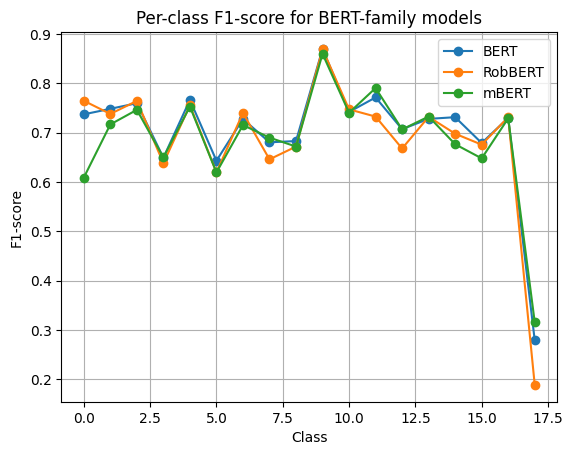

In [15]:
import matplotlib.pyplot as plt

for model in bert_models:
    plt.plot(classes, model_f1s[model], label=model, marker='o')

plt.xlabel("Class")
plt.ylabel("F1-score")
plt.title("Per-class F1-score for BERT-family models")
plt.legend()
plt.grid(True)
plt.show()


**Nemenyi**

In [10]:
import scikit_posthocs as sp
import numpy as np

# Nemenyi test requires input shape (n_samples, n_models)
nemenyi_data = correct_df[model_cols].to_numpy()
nemenyi_result = sp.posthoc_nemenyi_friedman(nemenyi_data)

# Pretty print
print("\n📊 Nemenyi Test (p-values):")
print(nemenyi_result.round(4))



📊 Nemenyi Test (p-values):
        0       1       2       3       4       5       6       7
0  1.0000  1.0000  0.9796  0.0968  0.9485  0.0000  0.0000  0.0000
1  1.0000  1.0000  0.9297  0.1763  0.9869  0.0000  0.0000  0.0000
2  0.9796  0.9297  1.0000  0.0043  0.4147  0.0000  0.0000  0.0000
3  0.0968  0.1763  0.0043  1.0000  0.7169  0.0000  0.0000  0.0000
4  0.9485  0.9869  0.4147  0.7169  1.0000  0.0000  0.0000  0.0000
5  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  1.0000  0.9427
6  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  1.0000  0.9905
7  0.0000  0.0000  0.0000  0.0000  0.0000  0.9427  0.9905  1.0000


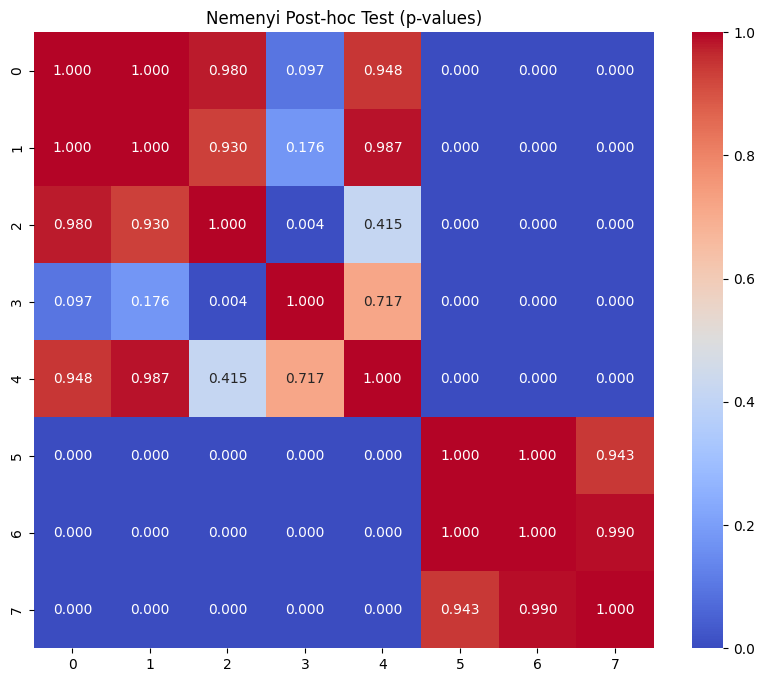

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(nemenyi_result, annot=True, fmt=".3f", cmap="coolwarm")
plt.title("Nemenyi Post-hoc Test (p-values)")
plt.show()


**McNemar**

In [12]:
from statsmodels.stats.contingency_tables import mcnemar
import itertools

mcnemar_results = []

for model_a, model_b in combinations(model_cols, 2):
    a_correct = correct_df[model_a]
    b_correct = correct_df[model_b]

    # Build 2x2 contingency table
    both_correct = ((a_correct == 1) & (b_correct == 1)).sum()
    only_a_correct = ((a_correct == 1) & (b_correct == 0)).sum()
    only_b_correct = ((a_correct == 0) & (b_correct == 1)).sum()
    both_wrong = ((a_correct == 0) & (b_correct == 0)).sum()

    table = [[both_correct, only_a_correct],
             [only_b_correct, both_wrong]]

    # McNemar test with continuity correction
    result = mcnemar(table, exact=False, correction=True)

    mcnemar_results.append({
        "Model A": model_a,
        "Model B": model_b,
        "Statistic": result.statistic,
        "p-value": result.pvalue,
        "Statistically Different (α = 0.05)": "Yes" if result.pvalue < 0.05 else "No"
    })

# Display
mcnemar_df = pd.DataFrame(mcnemar_results)
print("\n📊 McNemar Test Results:")
print(mcnemar_df)



📊 McNemar Test Results:
    Model A  Model B   Statistic        p-value  \
0        LR      SVM    0.440044   5.071012e-01   
1        LR       NB    3.796875   5.134833e-02   
2        LR       RF   31.344308   2.160913e-08   
3        LR      XGB    5.281375   2.155471e-02   
4        LR     BERT  681.191614  3.679516e-150   
5        LR  RobBERT  650.743902  1.539314e-143   
6        LR    mBERT  567.710068  1.767829e-125   
7       SVM       NB    6.490331   1.084628e-02   
8       SVM       RF   26.255487   2.991038e-07   
9       SVM      XGB    3.657347   5.582245e-02   
10      SVM     BERT  672.615269  2.696891e-148   
11      SVM  RobBERT  651.776989  9.175966e-144   
12      SVM    mBERT  579.272727  5.398555e-128   
13       NB       RF   54.710215   1.396784e-13   
14       NB      XGB   18.388857   1.801082e-05   
15       NB     BERT  690.149460  4.147538e-152   
16       NB  RobBERT  672.306239  3.148241e-148   
17       NB    mBERT  594.752410  2.318461e-131   
18    